<a href="https://colab.research.google.com/github/samramosvet/DNC/blob/main/Desafio_5_)_Desafio_4_E_commerce_37_paises_RID_94968_SAMUEL_RAMOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATA PREPARATION

Instalando as bibliotecas de análise e visualização de dados

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.2.2

In [ ]:
!pip install sidetable
!pip install pandas-profiling==3.3.0

In [ ]:
!pip install -U pydantic

In [ ]:
!pip install bump-pydantic

In [ ]:
!pip install "pydantic==1.*"

In [ ]:
from pandas_profiling import ProfileReport
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import sidetable
import ydata_profiling
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

Etapa 01) Leia o arquivo e inspecione os dados

In [6]:
import pandas as pd
base = pd.read_csv('/data.csv', sep =',')
base

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
137713,548166,21033,JUMBO BAG CHARLIE AND LOLA TOYS,1.0,3/29/2011 13:45,4.13,NaN,United Kingdom
137714,548166,21035,SET/2 RED RETROSPOT TEA TOWELS,1.0,3/29/2011 13:45,6.25,NaN,United Kingdom
137715,548166,21169,YOU'RE CONFUSING ME METAL SIGN,1.0,3/29/2011 13:45,4.13,NaN,United Kingdom
137716,548166,21200,MULTICOLOUR HONEYCOMB PAPER GARLAND,4.0,3/29/2011 13:45,3.29,NaN,United Kingdom


In [7]:
from pandas_profiling import ProfileReport
profile = ProfileReport(base)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137718 entries, 0 to 137717
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    137718 non-null  object 
 1   StockCode    135668 non-null  object 
 2   Description  135237 non-null  object 
 3   Quantity     135668 non-null  float64
 4   InvoiceDate  135668 non-null  object 
 5   UnitPrice    135667 non-null  float64
 6   CustomerID   93037 non-null   float64
 7   Country      135667 non-null  object 
dtypes: float64(3), object(5)
memory usage: 8.4+ MB


In [9]:
base.describe()

,Quantity,UnitPrice,CustomerID
count,135668.000000,135667.000000,93037.000000
mean,8.973671,5.215646,15293.709879
std,290.202030,107.015183,1740.058486
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13869.000000
50%,3.000000,2.460000,15194.000000
75%,10.000000,4.210000,16889.000000
max,74215.000000,16888.020000,18283.000000


In [44]:
# Outliers na coluna 'UnitPrice'
base[(base['UnitPrice'] > 5000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15016,C537630,AMAZONFEE,AMAZON FEE,-1.0,12/7/2010 15:04,13541.33,NaN,United Kingdom
15017,537632,AMAZONFEE,AMAZON FEE,1.0,12/7/2010 15:08,13541.33,NaN,United Kingdom
16232,C537644,AMAZONFEE,AMAZON FEE,-1.0,12/7/2010 15:34,13474.79,NaN,United Kingdom
16313,C537647,AMAZONFEE,AMAZON FEE,-1.0,12/7/2010 15:41,5519.25,NaN,United Kingdom
16356,C537651,AMAZONFEE,AMAZON FEE,-1.0,12/7/2010 15:49,13541.33,NaN,United Kingdom
16357,C537652,AMAZONFEE,AMAZON FEE,-1.0,12/7/2010 15:51,6706.71,NaN,United Kingdom
43702,C540117,AMAZONFEE,AMAZON FEE,-1.0,1/5/2011 9:55,16888.02,NaN,United Kingdom
43703,C540118,AMAZONFEE,AMAZON FEE,-1.0,1/5/2011 9:57,16453.71,NaN,United Kingdom
96844,C544587,AMAZONFEE,AMAZON FEE,-1.0,2/21/2011 15:07,5575.28,NaN,United Kingdom
96845,C544589,AMAZONFEE,AMAZON FEE,-1.0,2/21/2011 15:11,5258.77,NaN,United Kingdom


In [43]:
# Outliers na coluna 'Quantity'
base[(base['Quantity'] > 10000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215.0,1/18/2011 10:01,1.04,12346.0,United Kingdom


Etapa 02) Valores faltantes na identificação do cliente

In [10]:
# Identificar e mostrar valores nulos
base_missing = (
  base.isna().sum()
  .to_frame('missing_count')
  .join((base.isna().sum() / base.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)

base_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
CustomerID,44681,32.44%
Description,2481,1.80%
UnitPrice,2051,1.49%
Country,2051,1.49%
StockCode,2050,1.49%
Quantity,2050,1.49%
InvoiceDate,2050,1.49%
InvoiceNo,0,0.00%


In [11]:
base.stb.missing()

,missing,total,percent
CustomerID,44681,137718,32.443835
Description,2481,137718,1.801507
UnitPrice,2051,137718,1.489275
Country,2051,137718,1.489275
StockCode,2050,137718,1.488549
Quantity,2050,137718,1.488549
InvoiceDate,2050,137718,1.488549
InvoiceNo,0,137718,0.000000


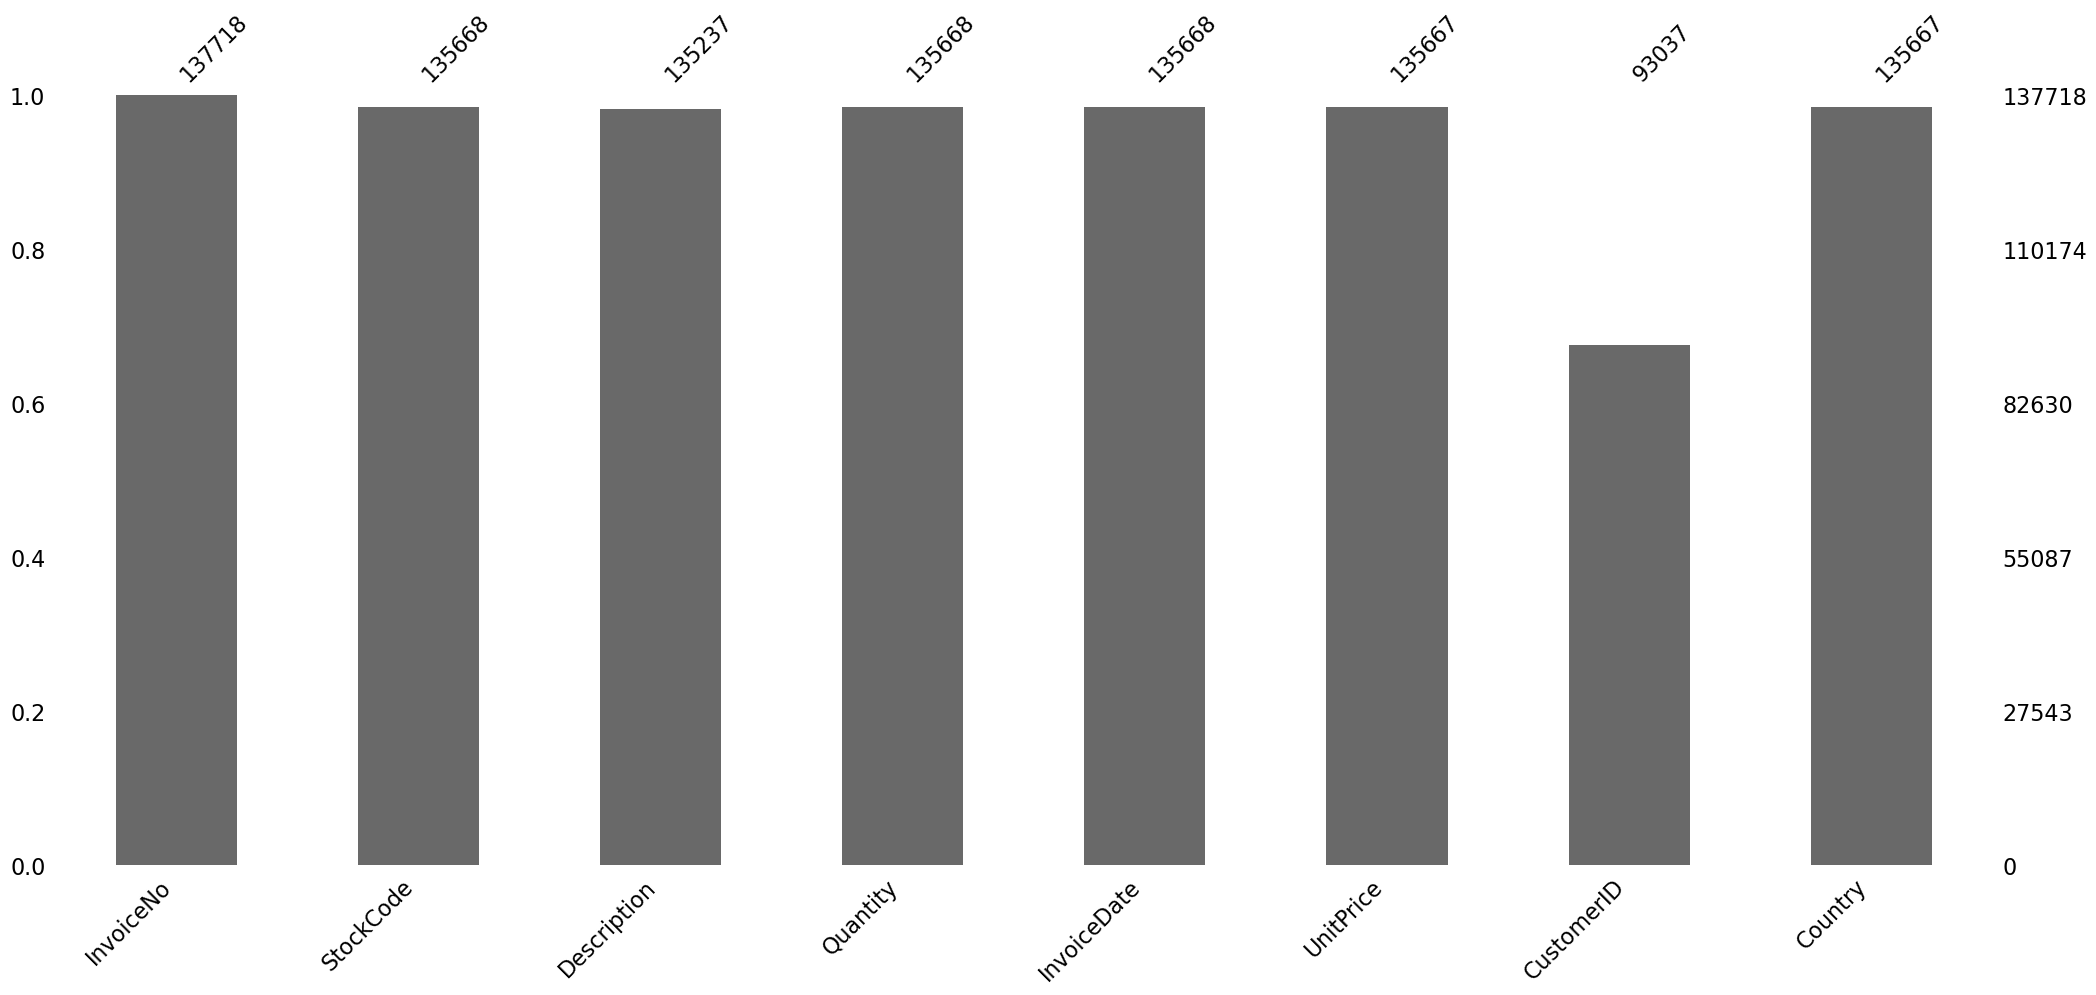

In [12]:
msno.bar(base);

In [20]:
# Linhas com valores faltantes
base.isna().any(axis=1).sum()

44681

In [18]:
# Linhas com valores faltantes
base[base.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
109,"536381,82567,""AIRLINE LOUNGE,METAL SIGN"",2,12/...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
253,"536394,21506,""FANCY FONT BIRTHDAY CARD, "",24,1...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
622,536414,22139,NaN,56.0,12/1/2010 11:52,0.00,NaN,United Kingdom
871,"536477,22041,""RECORD FRAME 7"""" SINGLE SIZE "",4...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,"536520,22760,""TRAY, BREAKFAST IN BED"",1,12/1/2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
137713,548166,21033,JUMBO BAG CHARLIE AND LOLA TOYS,1.0,3/29/2011 13:45,4.13,NaN,United Kingdom
137714,548166,21035,SET/2 RED RETROSPOT TEA TOWELS,1.0,3/29/2011 13:45,6.25,NaN,United Kingdom
137715,548166,21169,YOU'RE CONFUSING ME METAL SIGN,1.0,3/29/2011 13:45,4.13,NaN,United Kingdom
137716,548166,21200,MULTICOLOUR HONEYCOMB PAPER GARLAND,4.0,3/29/2011 13:45,3.29,NaN,United Kingdom


In [21]:
# Removendo as linhas com valores faltantes
base_sem_nulos = base.dropna()
base_sem_nulos

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
137445,548160,85185B,PINK HORSE SOCK PUPPET,12.0,3/29/2011 13:33,2.95,16253.0,United Kingdom
137446,548160,84879,ASSORTED COLOUR BIRD ORNAMENT,16.0,3/29/2011 13:33,1.69,16253.0,United Kingdom
137447,548160,23052,RECYCLED ACAPULCO MAT TURQUOISE,2.0,3/29/2011 13:33,8.25,16253.0,United Kingdom
137448,548160,85049D,BRIGHT BLUES RIBBONS,24.0,3/29/2011 13:33,1.25,16253.0,United Kingdom


Etapa 03) Preços unitários e quantidade de produtos
iguais ou inferior a 0


In [22]:
# Retorna se tem algum valor faltante na coluna (qualquer) True=Valor Faltante False=Não Há Valor Faltante
base_sem_nulos.isna().any()

InvoiceNo      False
StockCode      False
Description    False
Quantity       False
InvoiceDate    False
UnitPrice      False
CustomerID     False
Country        False
dtype: bool

In [23]:
# 1. Realize um filtro para verificar se existem dados nulos ou menor que zero na coluna de preços
base_sem_nulos[(base_sem_nulos['UnitPrice'] == 0) | (base_sem_nulos['UnitPrice'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1.0,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4.0,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10.0,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24.0,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24.0,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1.0,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16.0,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36.0,3/23/2011 10:25,0.0,13239.0,United Kingdom


In [24]:
# 2. Filtre o dataset apenas para conter preços acima de zero
base_sem_nulos[(base_sem_nulos['UnitPrice'] > 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
137445,548160,85185B,PINK HORSE SOCK PUPPET,12.0,3/29/2011 13:33,2.95,16253.0,United Kingdom
137446,548160,84879,ASSORTED COLOUR BIRD ORNAMENT,16.0,3/29/2011 13:33,1.69,16253.0,United Kingdom
137447,548160,23052,RECYCLED ACAPULCO MAT TURQUOISE,2.0,3/29/2011 13:33,8.25,16253.0,United Kingdom
137448,548160,85049D,BRIGHT BLUES RIBBONS,24.0,3/29/2011 13:33,1.25,16253.0,United Kingdom


In [25]:
# 3. Realize um filtro para verificar se existem dados nulos ou menor que zero na coluna de quantidade
base_sem_nulos[(base_sem_nulos['Quantity'] == 0) | (base_sem_nulos['Quantity'] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1.0,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
136849,C547992,22180,RETROSPOT LAMP,-1.0,3/29/2011 9:58,9.95,18225.0,United Kingdom
136850,C547992,22891,TEA FOR ONE POLKADOT,-3.0,3/29/2011 9:58,4.25,18225.0,United Kingdom
136967,C548009,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2.0,3/29/2011 10:55,4.95,14245.0,United Kingdom
137128,C548015,82583,HOT BATHS METAL SIGN,-30.0,3/29/2011 11:30,1.69,13802.0,United Kingdom


In [31]:
# 4. Filtre o dataset apenas para conter quantidade acima de zero
df = base_sem_nulos[(base_sem_nulos['UnitPrice'] > 0) & (base_sem_nulos['Quantity'] > 0)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
137445,548160,85185B,PINK HORSE SOCK PUPPET,12.0,3/29/2011 13:33,2.95,16253.0,United Kingdom
137446,548160,84879,ASSORTED COLOUR BIRD ORNAMENT,16.0,3/29/2011 13:33,1.69,16253.0,United Kingdom
137447,548160,23052,RECYCLED ACAPULCO MAT TURQUOISE,2.0,3/29/2011 13:33,8.25,16253.0,United Kingdom
137448,548160,85049D,BRIGHT BLUES RIBBONS,24.0,3/29/2011 13:33,1.25,16253.0,United Kingdom


Etapa 04) Verifique se existem linhas duplicadas

In [32]:
# 1. Verifique se tem linhas duplicadas com a função duplicated
# Soma total de linhas duplicadas somente
df.duplicated().sum()

1210

In [33]:
# Identificar quantos valores duplicados há em cada duplicata
(
  df
 .groupby(df.columns.tolist(), dropna=False)
 .size()
 .to_frame('n_duplicates')
 .query('n_duplicates>1')
 .sort_values('n_duplicates', ascending=False)
)

n_duplicates
InvoiceNo StockCode Description                       Quantity InvoiceDate      UnitPrice CustomerID Country                     
538514    21756     BATH BUILDING BLOCK WORD          1.0      12/12/2010 14:27 5.95      15044.0    United Kingdom             6
540524    21756     BATH BUILDING BLOCK WORD          1.0      1/9/2011 12:53   5.95      16735.0    United Kingdom             6
541266    21755     LOVE BUILDING BLOCK WORD          1.0      1/16/2011 16:25  5.95      15673.0    United Kingdom             6
          21754     HOME BUILDING BLOCK WORD          1.0      1/16/2011 16:25  5.95      15673.0    United Kingdom             6
537224    70007     HI TEC ALPINE HAND WARMER         1.0      12/5/2010 16:24  1.65      13174.0    United Kingdom             5
...                                                                                                                           ...
539317    22051     BLUE SCANDINAVIAN PAISLEY WRAP    25.0     12/16/2010 19:04 0.42      17392.0    United Kingdom             2
          22335     HEART DECORATION PAINTED ZINC     2.0      12/16/2010 19:04 0.65      17392.0    United Kingdom             2
          22443     GROW YOUR OWN HERBS SET OF 3      1.0      12/16/2010 19:04 7.95      17392.0    United Kingdom             2
          22470     HEART OF WICKER LARGE             2.0      12/16/2010 19:04 2.95      17392.0    United Kingdom             2
541838    22789     T-LIGHT HOLDER SWEETHEART HANGING 4.0      1/23/2011 10:43  1.95      12916.0    United Kingdom             2

[1114 rows x 1 columns]

In [34]:
# 2. Drope as linhas duplicadas
df = df.drop_duplicates()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
137445,548160,85185B,PINK HORSE SOCK PUPPET,12.0,3/29/2011 13:33,2.95,16253.0,United Kingdom
137446,548160,84879,ASSORTED COLOUR BIRD ORNAMENT,16.0,3/29/2011 13:33,1.69,16253.0,United Kingdom
137447,548160,23052,RECYCLED ACAPULCO MAT TURQUOISE,2.0,3/29/2011 13:33,8.25,16253.0,United Kingdom
137448,548160,85049D,BRIGHT BLUES RIBBONS,24.0,3/29/2011 13:33,1.25,16253.0,United Kingdom


Etapa 05) Tipos de dados da coluna


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89525 entries, 0 to 137449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    89525 non-null  object 
 1   StockCode    89525 non-null  object 
 2   Description  89525 non-null  object 
 3   Quantity     89525 non-null  float64
 4   InvoiceDate  89525 non-null  object 
 5   UnitPrice    89525 non-null  float64
 6   CustomerID   89525 non-null  float64
 7   Country      89525 non-null  object 
dtypes: float64(3), object(5)
memory usage: 6.1+ MB


In [36]:
df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
df['Quantity'] = df['Quantity'].astype('int')
df['CustomerID'] = df['CustomerID'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89525 entries, 0 to 137449
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    89525 non-null  object        
 1   StockCode    89525 non-null  object        
 2   Description  89525 non-null  object        
 3   Quantity     89525 non-null  int64         
 4   InvoiceDate  89525 non-null  datetime64[ns]
 5   UnitPrice    89525 non-null  float64       
 6   CustomerID   89525 non-null  int64         
 7   Country      89525 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 6.1+ MB


<ipython-input-36-4a1afc0a8aee>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = df['InvoiceDate'].astype('datetime64[ns]')
<ipython-input-36-4a1afc0a8aee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity'] = df['Quantity'].astype('int')
<ipython-input-36-4a1afc0a8aee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

Etapa 06) Tratando os outliers

In [37]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,89525.000000,89525.000000,89525.000000
mean,13.581033,3.209546,15295.082078
std,252.450313,9.858279,1741.506806
min,1.000000,0.060000,12346.000000
25%,2.000000,1.250000,13869.000000
50%,6.000000,1.950000,15194.000000
75%,12.000000,3.750000,16891.000000
max,74215.000000,1687.170000,18283.000000


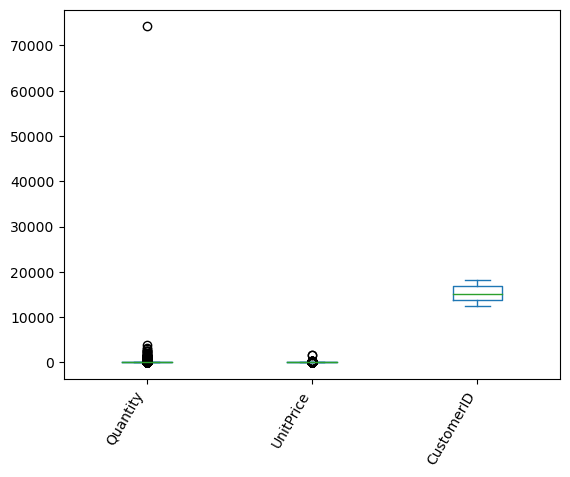

In [38]:
# Dica: Vamos considerar estes valores como erro.Visualize os outliers e
#remova os outliers extremos em que a quantidade do item na compra é
#superior a 10.000, e o preço unitário é maior que 5.000.

# Box plot com dados
df.plot.box()
plt.xticks(rotation=60, ha='right');

In [39]:
# valores de 'Quantity' outliers
df[(df['Quantity'] > 10000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346,United Kingdom


In [40]:
# valores de 'UnitPrice' outliers
df[(df['UnitPrice'] > 5000)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [45]:
df_sem_outliers = df[(df['Quantity'] <= 10000) & (df['UnitPrice'] <= 5000)]
df_sem_outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
137445,548160,85185B,PINK HORSE SOCK PUPPET,12,2011-03-29 13:33:00,2.95,16253,United Kingdom
137446,548160,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-03-29 13:33:00,1.69,16253,United Kingdom
137447,548160,23052,RECYCLED ACAPULCO MAT TURQUOISE,2,2011-03-29 13:33:00,8.25,16253,United Kingdom
137448,548160,85049D,BRIGHT BLUES RIBBONS,24,2011-03-29 13:33:00,1.25,16253,United Kingdom


In [46]:
# Os valores considerados outliers fora do dataset
df_sem_outliers.describe()

,Quantity,UnitPrice,CustomerID
count,89524.000000,89524.000000,89524.000000
mean,12.752189,3.209570,15295.115019
std,47.213417,9.858331,1741.488640
min,1.000000,0.060000,12347.000000
25%,2.000000,1.250000,13869.000000
50%,6.000000,1.950000,15194.000000
75%,12.000000,3.750000,16891.000000
max,3906.000000,1687.170000,18283.000000


Etapa 07) Crie uma coluna adicional

In [54]:
#� Dica: Utilize as colunas Quantity e UnitPrice. Crie uma coluna adicional com o preço total da compra
df_sem_outliers['Preco Total'] = df_sem_outliers['Quantity'] * df_sem_outliers['UnitPrice']
df_sem_outliers['Mes'] = df_sem_outliers['InvoiceDate'].dt.month
df_sem_outliers['Data Sistema'] = df_sem_outliers['InvoiceDate'].max()
df_sem_outliers

<ipython-input-54-c8a0ab2e77ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outliers['Preco Total'] = df_sem_outliers['Quantity'] * df_sem_outliers['UnitPrice']
<ipython-input-54-c8a0ab2e77ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outliers['Mes'] = df_sem_outliers['InvoiceDate'].dt.month
<ipython-input-54-c8a0ab2e77ff>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preco Total,Mes,Data Sistema
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2011-03-29 13:33:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2011-03-29 13:33:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,12,2011-03-29 13:33:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2011-03-29 13:33:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2011-03-29 13:33:00
...,...,...,...,...,...,...,...,...,...,...,...
137445,548160,85185B,PINK HORSE SOCK PUPPET,12,2011-03-29 13:33:00,2.95,16253,United Kingdom,35.40,3,2011-03-29 13:33:00
137446,548160,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2011-03-29 13:33:00,1.69,16253,United Kingdom,27.04,3,2011-03-29 13:33:00
137447,548160,23052,RECYCLED ACAPULCO MAT TURQUOISE,2,2011-03-29 13:33:00,8.25,16253,United Kingdom,16.50,3,2011-03-29 13:33:00
137448,548160,85049D,BRIGHT BLUES RIBBONS,24,2011-03-29 13:33:00,1.25,16253,United Kingdom,30.00,3,2011-03-29 13:33:00


Etapa 08) Última data

In [55]:
#Dica: Utilize a função max(). Calcule a data da última compra no dataset como um todo, pois vamos utilizar este valor como data de comparação para cálculo da recência.
df_sem_outliers.groupby(['InvoiceNo'])[['InvoiceDate']].max().sort_values('InvoiceDate')

,InvoiceDate
InvoiceNo,
536365,2010-12-01 08:26:00
536366,2010-12-01 08:28:00
536367,2010-12-01 08:34:00
536368,2010-12-01 08:34:00
536369,2010-12-01 08:35:00
...,...
548156,2011-03-29 13:22:00
548157,2011-03-29 13:27:00
548158,2011-03-29 13:28:00


Etapa 09) Plotando gráficos

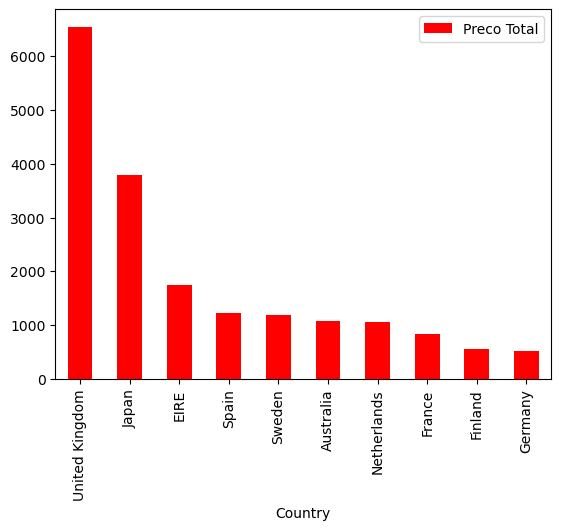

In [56]:
# Top 10 países com maior valor em vendas
df_sem_outliers.groupby(['Country'])[['Preco Total']].max().sort_values('Preco Total', ascending=False).head(10).plot(kind='bar', color="red");

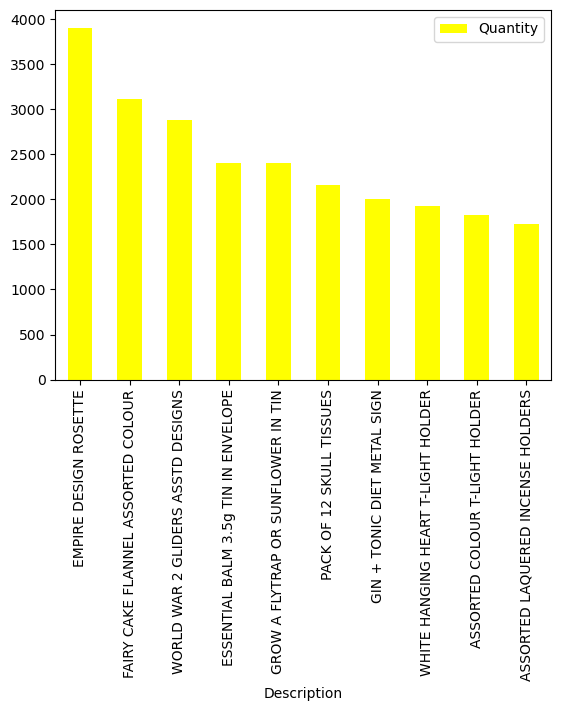

In [57]:
# Top 10 produtos mais vendidos
df_sem_outliers.groupby(['Description'])[['Quantity']].max().sort_values('Quantity', ascending=False).head(10).plot(kind='bar', color="yellow");

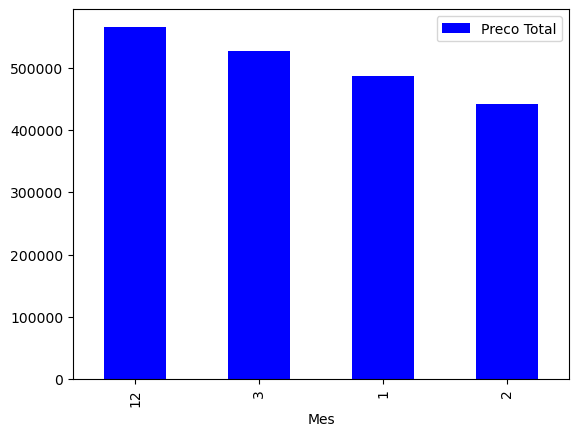

In [58]:
# Valor de venda total por mês
df_sem_outliers.groupby(['Mes'])[['Preco Total']].sum().sort_values('Preco Total', ascending=False).plot(kind='bar', color="blue");

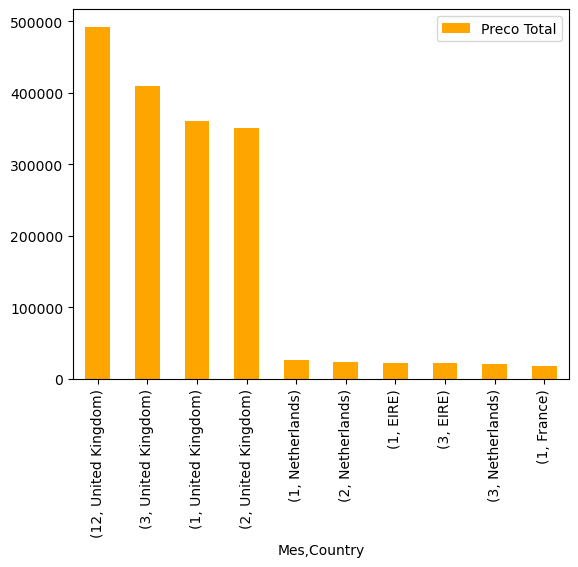

In [59]:
# Valor de venda total por mês e por país (considere apenas os top 10)
df_sem_outliers.groupby(['Mes', 'Country'])[['Preco Total']].sum().sort_values('Preco Total', ascending=False).head(10).plot(kind='bar', color="orange");

Etapa 10) Cálculo do RFM

In [60]:
#💡 Dica: Agrupe os dados por cliente e pedido/compra (InvoiceNo) e obtenha a data e o preço total do pedido.
# Com isso, agrupe novamente apenas por cliente e calcule o RFM, onde:

df_sem_outliers.groupby(['InvoiceNo'])[['InvoiceDate', 'Data Sistema', 'Preco Total']].max().sort_values('InvoiceDate', ascending=False)
df_sem_outliers['Recencia'] = df_sem_outliers['Data Sistema'] - df_sem_outliers['InvoiceDate']
df_sem_outliers.sort_values('Recencia', ascending=False)

<ipython-input-60-02f254e46a8c>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_outliers['Recencia'] = df_sem_outliers['Data Sistema'] - df_sem_outliers['InvoiceDate']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preco Total,Mes,Data Sistema,Recencia
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,12,2011-03-29 13:33:00,118 days 05:07:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2011-03-29 13:33:00,118 days 05:07:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850,United Kingdom,25.50,12,2011-03-29 13:33:00,118 days 05:07:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850,United Kingdom,15.30,12,2011-03-29 13:33:00,118 days 05:07:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,12,2011-03-29 13:33:00,118 days 05:07:00
...,...,...,...,...,...,...,...,...,...,...,...,...
137417,548160,22148,EASTER CRAFT 4 CHICKS,12,2011-03-29 13:33:00,1.95,16253,United Kingdom,23.40,3,2011-03-29 13:33:00,0 days 00:00:00
137418,548160,22265,EASTER DECORATION NATURAL CHICK,24,2011-03-29 13:33:00,0.65,16253,United Kingdom,15.60,3,2011-03-29 13:33:00,0 days 00:00:00
137419,548160,21389,IVORY HANGING DECORATION BIRD,12,2011-03-29 13:33:00,0.85,16253,United Kingdom,10.20,3,2011-03-29 13:33:00,0 days 00:00:00
137420,548160,22284,HEN HOUSE DECORATION,12,2011-03-29 13:33:00,1.65,16253,United Kingdom,19.80,3,2011-03-29 13:33:00,0 days 00:00:00


In [61]:
# R é a recência, diferença em dias da última compra do cliente e da última compra disponível no conjunto de dados, que calcularam previamente.
df_sem_outliers.groupby(['InvoiceNo'])[['Preco Total', 'Recencia']].max().sort_values('Preco Total', ascending=False)

,Preco Total,Recencia
InvoiceNo,,
540815,6539.40,77 days 00:38:00
540818,4522.50,77 days 00:36:00
540689,4121.64,77 days 04:50:00
537659,3828.00,111 days 20:50:00
537899,3794.40,110 days 02:49:00
...,...,...
538669,0.95,105 days 21:15:00
538194,0.95,109 days 02:41:00
539645,0.95,98 days 21:30:00


In [62]:
# M é o ticket médio, ou seja, a média das compras feitas pelo cliente.
df_sem_outliers.groupby(['InvoiceNo'])[['Preco Total']].mean().sort_values('Preco Total', ascending=False)

,Preco Total
InvoiceNo,
540815,5053.633333
540818,3918.750000
537899,3794.400000
544612,3202.920000
540689,3199.380000
...,...
539645,0.950000
538669,0.950000
538194,0.950000


In [63]:
# F é a frequência, ou seja, a quantidade de compras feitas pelo cliente;
df_sem_outliers.groupby('InvoiceNo').size()

InvoiceNo
536365     7
536366     2
536367    12
536368     4
536369     1
          ..
548156    20
548157    14
548158    28
548159     4
548160    53
Length: 4557, dtype: int64